# Implementación del Random Forest

En este notebook se encuentra la implementación del algoritmo Random Forest Regression con el objetivo de estimar el precio de vehículos usados a partir de ciertas características.

# Importamos las librerías necesarias

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [55]:
plt.rcParams['figure.facecolor'] = 'white'

# Importamos los datos limpios

In [24]:
df = pd.read_excel('data.xlsx')
df

,Unnamed: 0,price,DOORS,ENGINE,KILOMETERS,TRANSMISSION,ANTIQUITY,TRACTION_CONTROL,FUEL_TYPE_Diésel,FUEL_TYPE_Eléctrico,...,BRAND_Peugeot,BRAND_Porsche,BRAND_Renault,BRAND_SEAT,BRAND_Ssangyong,BRAND_Subaru,BRAND_Suzuki,BRAND_Toyota,BRAND_Volkswagen,BRAND_Volvo
0,0,70000000,1,2000,99000,1,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,0,5000,159780,1,44,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,43000000,1,2000,100500,1,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,52000000,1,1000,73000,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,52000000,1,2000,165000,1,17,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,9537,97500000,0,2000,70000,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8584,9538,99000000,1,1000,24000,1,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8585,9539,36900000,1,1000,66000,1,8,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8586,9541,52990000,1,1000,60100,1,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separamos los datos en conjuntos de entrenamiento y prueba

In [25]:
features = ['DOORS', 'ENGINE', 'KILOMETERS', 'TRANSMISSION',
            'ANTIQUITY', 'TRACTION_CONTROL', 'FUEL_TYPE_Diésel',
            'FUEL_TYPE_Eléctrico', 'FUEL_TYPE_Gasolina',
            'FUEL_TYPE_Gasolina_y_gas', 'FUEL_TYPE_Híbrido', 'BRAND_Audi',
            'BRAND_BMW', 'BRAND_Chevrolet', 'BRAND_Citroën', 'BRAND_Dodge',
            'BRAND_Fiat', 'BRAND_Ford', 'BRAND_Honda', 'BRAND_Hyundai',
            'BRAND_Jeep', 'BRAND_Kia', 'BRAND_Land', 'BRAND_Lexus',
            'BRAND_Mazda', 'BRAND_Mercedes_Benz', 'BRAND_Mini',
            'BRAND_Mitsubishi', 'BRAND_Nissan', 'BRAND_Otra', 'BRAND_Peugeot',
            'BRAND_Porsche', 'BRAND_Renault', 'BRAND_SEAT', 'BRAND_Ssangyong',
            'BRAND_Subaru', 'BRAND_Suzuki', 'BRAND_Toyota', 'BRAND_Volkswagen',
            'BRAND_Volvo']
X = df.loc[:, features]
y = df.loc[:, ['price']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### Ajustamos el modelo a los datos usando los hiperparámetros dados por defecto

In [42]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

/var/folders/tj/znksv9ns4vj39zb3q8vb9yx00000gn/T/ipykernel_9673/1192292264.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

### Calculamos el error

In [43]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)


0.8359190336386484

### Imprimimos los resultados

In [44]:
y_prediction = pd.DataFrame(y_pred)
res = [y_test['price'].tolist(), y_prediction[0].to_list()]
result = pd.DataFrame(res)
result = result.T
result = result.rename(columns={0:"Real price",1:"Predicted price"})
result

,Real price,Predicted price
0,131900000.0,1.139946e+08
1,139500000.0,1.433999e+08
2,99000000.0,8.521700e+07
3,24900000.0,2.989080e+07
4,25500000.0,3.469290e+07
...,...,...
2142,52900000.0,4.808710e+07
2143,22000000.0,3.626300e+07
2144,149000000.0,1.360044e+08
2145,61800000.0,7.625900e+07


# Exportamos los conjuntos de entrenamiento y prueba

In [29]:
X_train.to_excel('X_train.xlsx')
X_test.to_excel('X_test.xlsx')
y_train.to_excel('y_train.xlsx')
y_test.to_excel('y_test.xlsx')

# Realizamos un tuneo de hiperparámetros

### Usamos RandomizedSearchCV

Experimentamos con los siguientes hiperparámetros

In [88]:
n_estimators = [5,20,50,100,150,200,250,300,350] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10, 15, 20] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4, 8, 10] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

In [89]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=1, random_state=35, n_jobs = -1)

In [90]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 8, 10],
                                        'min_samples_split': [2, 6, 10, 15, 20],
                                        'n_estimators': [5, 20, 50, 100, 150,
                                                         200, 250, 300, 350]},
                   random_state=35, verbose=1)

Getting the best parameters

In [91]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 150, 200, 250, 300, 350], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10, 15, 20], 'min_samples_leaf': [1, 3, 4, 8, 10], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}  



# Usamos la mejor combinación de hiperparámetros encontrada

In [113]:
model = RandomForestRegressor(n_estimators = 200, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 60, bootstrap=True) 
model.fit( X_train, y_train) 

/var/folders/tj/znksv9ns4vj39zb3q8vb9yx00000gn/T/ipykernel_9673/3111583232.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit( X_train, y_train)


RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_split=6,
                      n_estimators=200)

In [104]:
y_pred = model.predict(X_test)

### Imprimimos los resultados de la estimación

In [105]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test['price'], 
"predicted_prob":  y_pred} ) 
y_pred_rf1

,actual,predicted_prob
4849,131900000,1.153851e+08
8227,139500000,1.435828e+08
7591,99000000,8.967771e+07
7272,24900000,3.136934e+07
5575,25500000,3.831406e+07
...,...,...
5082,52900000,4.748245e+07
7785,22000000,3.726958e+07
2407,149000000,1.330539e+08
3545,61800000,7.767191e+07


### Calculamos el error cometido en el conjunto de prueba

In [115]:
r2_score(y_test, y_pred)

0.8496218826826815

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

14385752.252560366

In [108]:
mean_absolute_percentage_error(y_test, y_pred)

0.1742582330420518

### Calculamos el error cometido en el conjunto de entrenamiento

In [109]:
y_pred2 = model.predict(X_train)

In [110]:
r2_score(y_train, y_pred2)

0.9368600640288784

In [111]:
np.sqrt(mean_squared_error(y_train, y_pred2))

9451481.008644098

In [112]:
mean_absolute_percentage_error(y_train, y_pred2)

0.10480009335327796

## Realizamos validación con k-folds

In [118]:
scores = cross_val_score(model, X, y, cv=10, verbose=0, scoring='r2')
scores

/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilocossio/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

array([0.83584426, 0.85229777, 0.87311978, 0.8711867 , 0.87393701,
       0.85673427, 0.83084165, 0.82161297, 0.87268245, 0.88228924])

In [119]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.02


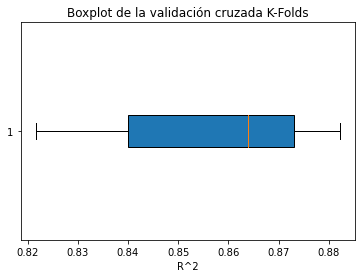

In [120]:
accuracy = [0.83584426, 0.85229777, 0.87311978, 0.8711867 , 0.87393701,
       0.85673427, 0.83084165, 0.82161297, 0.87268245, 0.88228924]
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(accuracy,vert=False,patch_artist=True)

ax.set_title('Boxplot de la validación cruzada K-Folds')
ax.set_xlabel('R^2')
ax.set_ylabel('')
plt.show()